In [1]:
import os
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

<h3>Read audio files</h3>


In [2]:
riff1_file = "audio/riff1.wav"
riff2_file = "audio/riff2.wav"
riff3_file = "audio/riff3.wav"
riff4_file = "audio/riff4.wav"

In [3]:
ipd.Audio(riff1_file)

In [4]:
ipd.Audio(riff2_file)

In [5]:
ipd.Audio(riff3_file)

In [6]:
ipd.Audio(riff4_file)

In [7]:
# Load stuff with librosa
riff1, sr = librosa.load(riff1_file)
riff2, _ = librosa.load(riff2_file)
riff3, _ = librosa.load(riff3_file)
riff4, _ = librosa.load(riff3_file)
    

<h3>Extracting Short-Time Fourier Transform</h3>

In [8]:
FRAME_SIZE = 2048
HOP_SIZE = 512

In [9]:
S_riff1 = librosa.stft(riff1, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

In [10]:
S_riff1.shape

(1025, 304)

In [11]:
type(S_riff1[0][0])

numpy.complex64

<h3>Calculate spectogram</h3>

In [12]:
Y_riff1 = np.abs(S_riff1) ** 2

In [13]:
Y_riff1.shape

(1025, 304)

In [14]:
type(Y_riff1[0][0])

numpy.float32

<h3>Visualizing the spectogram</h3>

In [15]:
def plot_spectogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25,10))
    librosa.display.specshow(Y, sr=sr, hop_length = hop_length, x_axis="time", y_axis=y_axis)
    plt.colorbar(format="%+2.f")

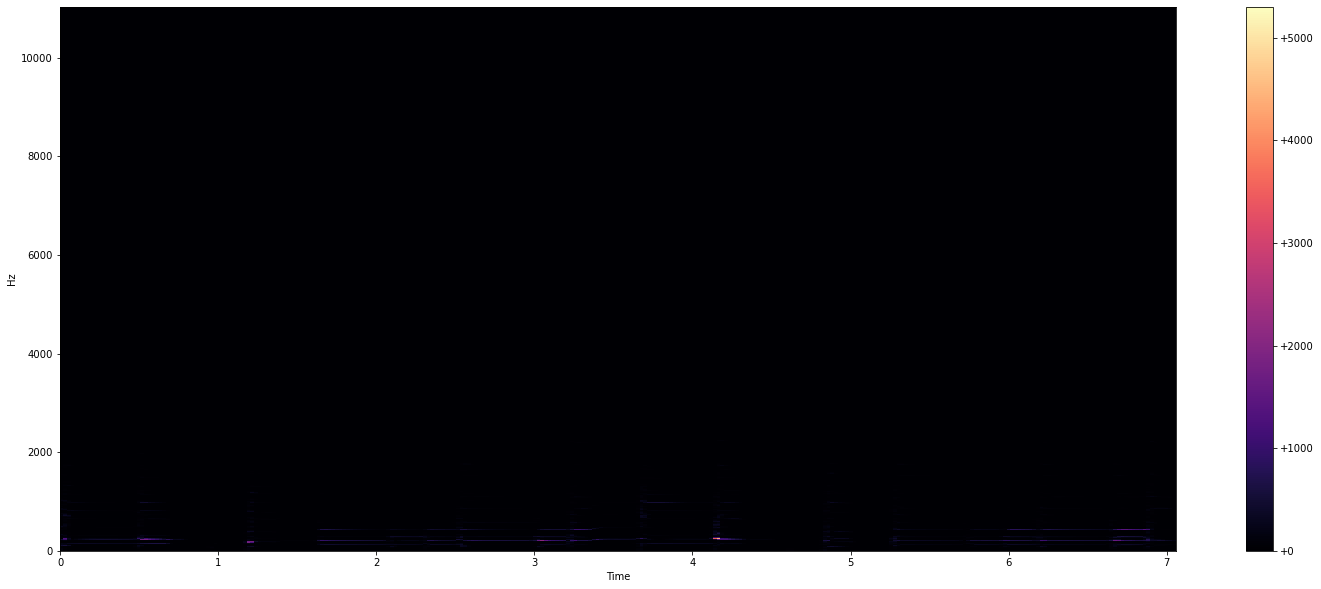

In [16]:
plot_spectogram(Y_riff1, sr, HOP_SIZE)

<h3>Log-Amplitude Specogram</h3>

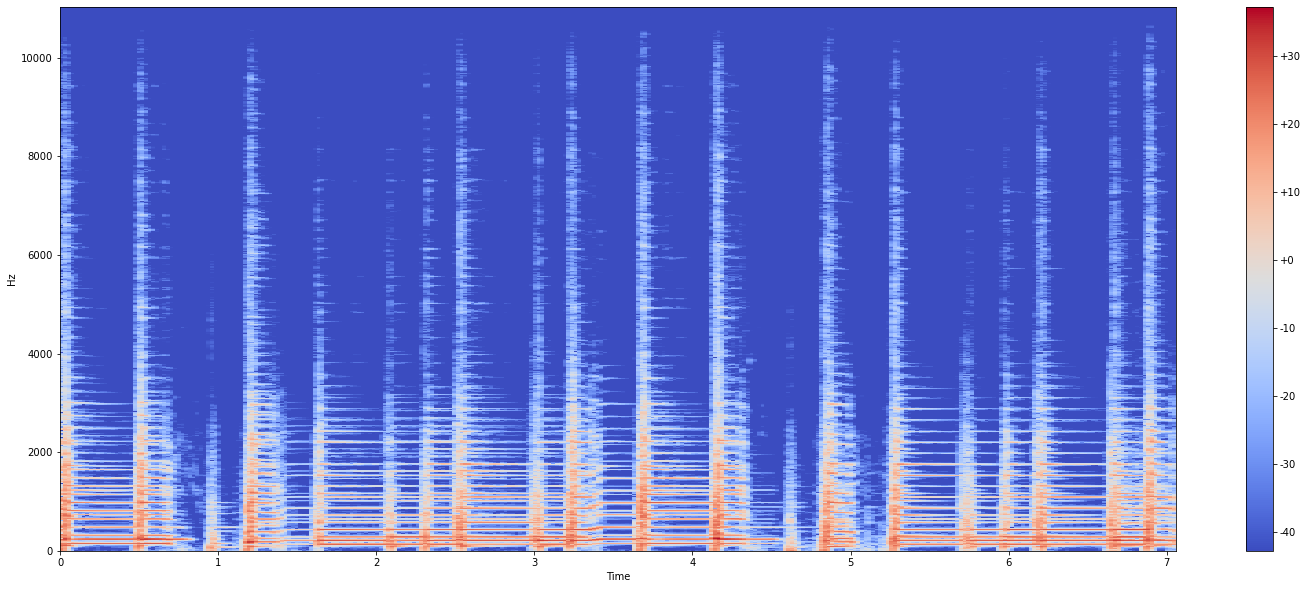

In [17]:
Y_log_riff1 = librosa.power_to_db(Y_riff1)
plot_spectogram(Y_log_riff1, sr, HOP_SIZE)

<h3>Log-Frequency Specogram</h3>

c:\python36\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
c:\python36\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
c:\python36\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


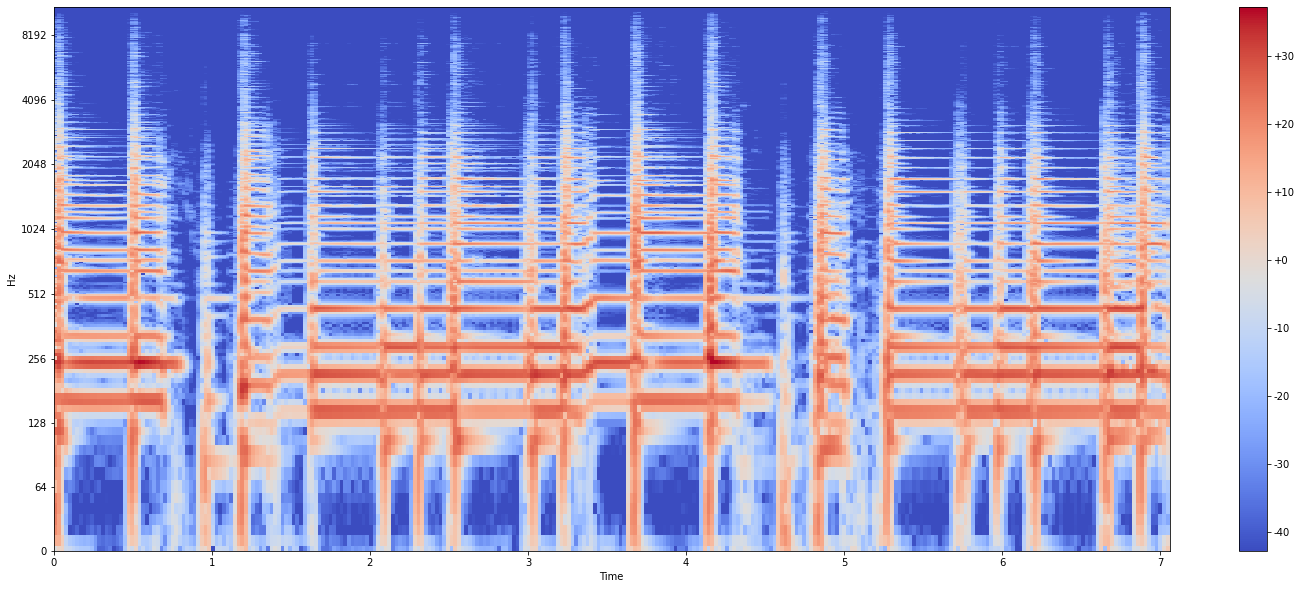

In [18]:
plot_spectogram(Y_log_riff1, sr, HOP_SIZE, y_axis="log")

<h3>Other files</h3>

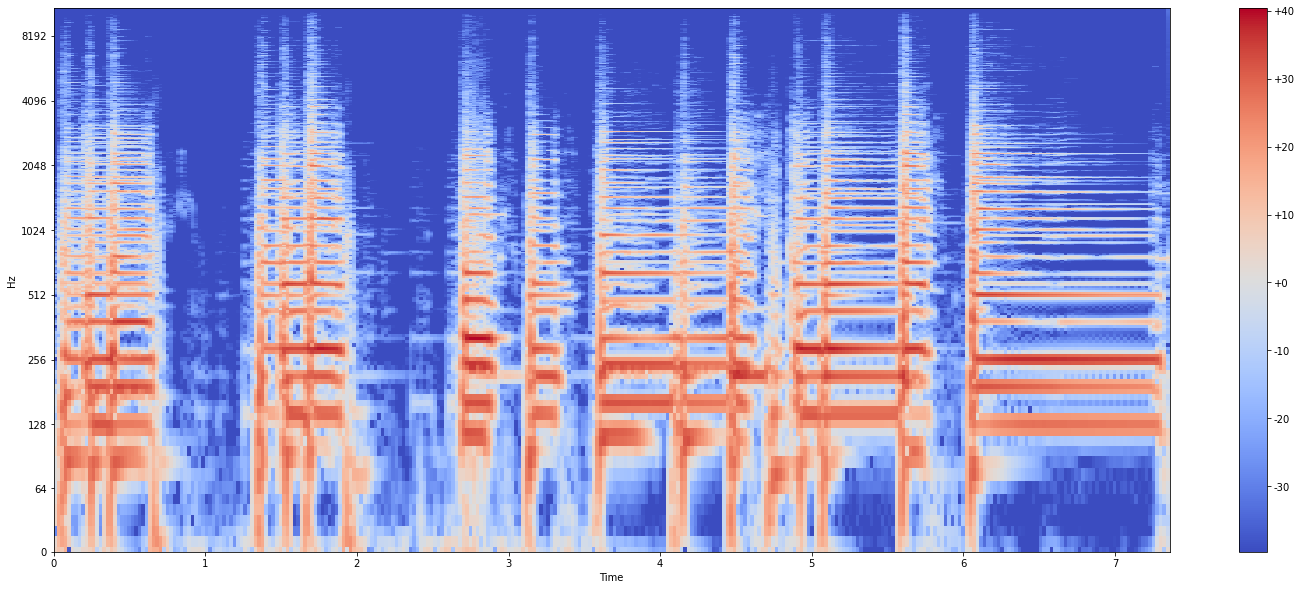

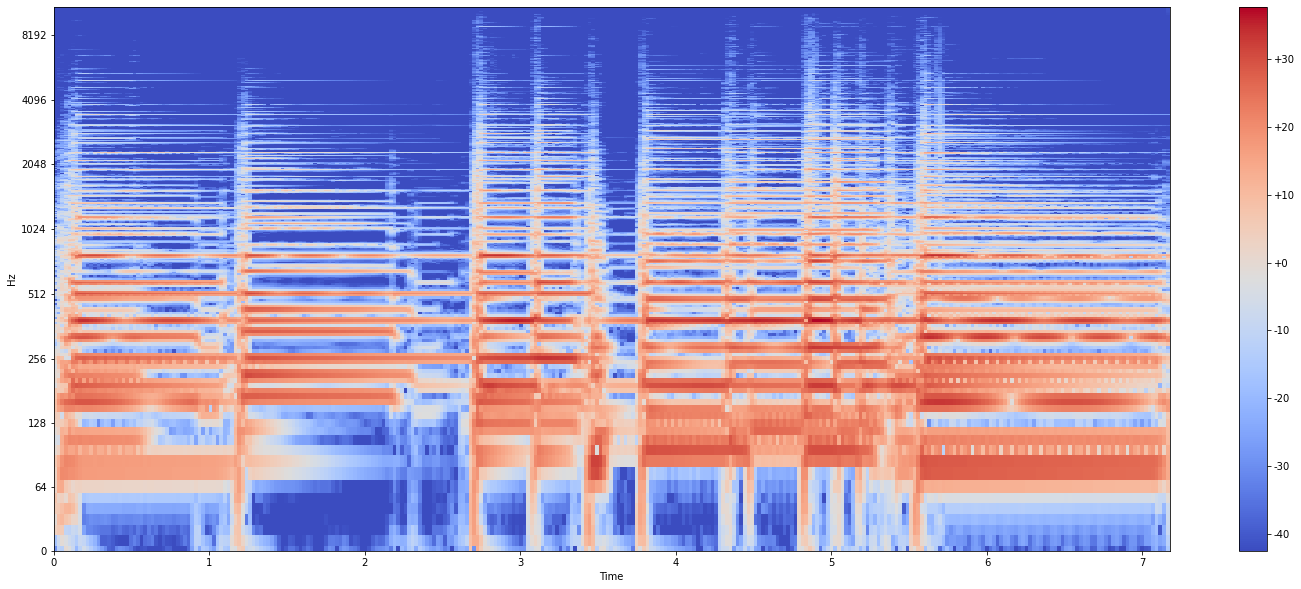

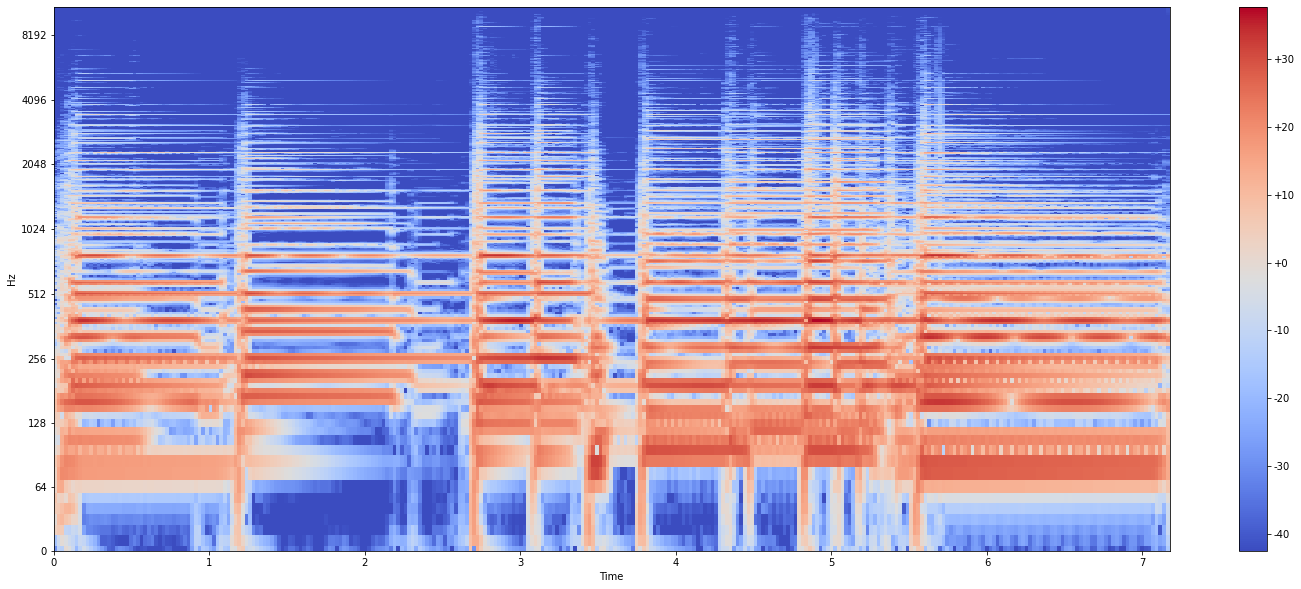

In [19]:
S_riff2 = librosa.stft(riff2, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
S_riff3 = librosa.stft(riff3, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
S_riff4 = librosa.stft(riff4, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

Y_riff2 = librosa.power_to_db(np.abs(S_riff2) ** 2)
Y_riff3 = librosa.power_to_db(np.abs(S_riff3) ** 2)
Y_riff4 = librosa.power_to_db(np.abs(S_riff4) ** 2)

plot_spectogram(Y_riff2, sr, HOP_SIZE, y_axis="log")
plot_spectogram(Y_riff3, sr, HOP_SIZE, y_axis="log")
plot_spectogram(Y_riff4, sr, HOP_SIZE, y_axis="log")